In [ ]:
!git clone git@github.com:fkariminejadasl/tracking.git
%cd tracking
!git checkout hungerian_track
!python3 -m venv ~/venv/p3
!source ~/venv/p3/bin/activate
!pip3 install -r requirements.txt

In [1]:
from data_association import *
from stereo import *
from visualize import *

result_folder = Path("/home/fatemeh/results/dataset1")
data_folder = Path("/home/fatemeh/data/dataset1")
det_folder1 = data_folder / "cam1_labels/cam1_labels"
det_folder2 = data_folder / "cam2_labels/cam2_labels"
filename_fixpart1 = "12_07_22_1_C_GH040468_1_cam1_rect"
filename_fixpart2 = "12_07_22_1_D_GH040468_1_cam2_rect"
vc1 = cv2.VideoCapture((data_folder / f"{filename_fixpart1}.mp4").as_posix())
vc2 = cv2.VideoCapture((data_folder / f"{filename_fixpart2}.mp4").as_posix())

height, width, total_no_frames, fps = get_video_parameters(vc1)

In [2]:
# tracking
tracks1 = compute_tracks(det_folder1, filename_fixpart1, width, height)
tracks2 = compute_tracks(det_folder2, filename_fixpart2, width, height)

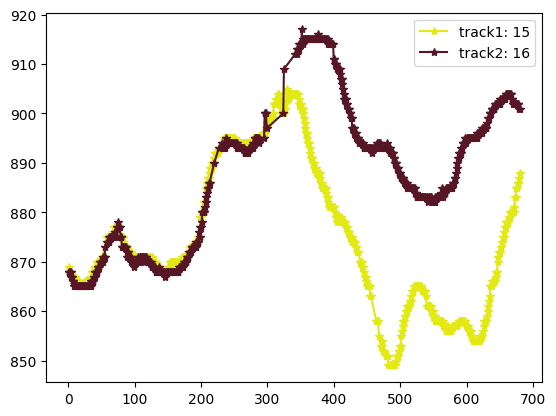

In [3]:
plot_frameid_y_for_stereo(tracks1, [15], tracks2, [16])

Track is a dictionary with key is the track_id. Track contain `coords`, which is the list of detections. Each detection has a x, y, width, height and frame_id. 

In [4]:
tracks2[34]

Track(coords=[Detection(x=1278, y=883, w=22, h=16, id=2), Detection(x=1277, y=886, w=12, h=7, id=10), Detection(x=1267, y=887, w=16, h=9, id=21)], predicted_loc=Detection(x=1265.9117296792942, y=879.5951377683926, w=22, h=16, id=34), color=(0.4316, 0.1973, 0.09174), frameids=[2, 10, 21], status=<Status.Stoped: 3>)

In [ ]:
all_matches = compute_possible_matches(tracks1, tracks2)
all_matches_inv = compute_possible_matches(tracks2, tracks1)
save_all_matches(match_file, all_matches, inverse=False)
save_all_matches(match_file, all_matches_inv, inverse=True)